# Capstone Project 1: MuscleHub AB Test

## Step 1: Get started with SQL

Like most businesses, Janet keeps her data in a SQL database.  Normally, you'd download the data from her database to a csv file, and then load it into a Jupyter Notebook using Pandas.

For this project, you'll have to access SQL in a slightly different way.  You'll be using a special Codecademy library that lets you type SQL queries directly into this Jupyter notebook.  You'll have pass each SQL query as an argument to a function called `sql_query`.  Each query will return a Pandas DataFrame.  Here's an example:

In [183]:
# This import only needs to happen once, at the beginning of the notebook
from codecademySQL import sql_query

In [184]:
# Here's an example of a query that just displays some data
sql_query('''
SELECT *
FROM visits
LIMIT 5
''')

,index,first_name,last_name,email,gender,visit_date
0,0,Karen,Manning,Karen.Manning@gmail.com,female,5-1-17
1,1,Annette,Boone,AB9982@gmail.com,female,5-1-17
2,2,Salvador,Merritt,SalvadorMerritt12@outlook.com,male,5-1-17
3,3,Martha,Maxwell,Martha.Maxwell@gmail.com,female,5-1-17
4,4,Andre,Mayer,AndreMayer90@gmail.com,male,5-1-17


In [185]:
# Here's an example where we save the data to a DataFrame
df = sql_query('''
SELECT *
FROM applications
LIMIT 5
''')

## Step 2: Get your dataset

Let's get started!

Janet of MuscleHub has a SQLite database, which contains several tables that will be helpful to you in this investigation:
- `visits` contains information about potential gym customers who have visited MuscleHub
- `fitness_tests` contains information about potential customers in "Group A", who were given a fitness test
- `applications` contains information about any potential customers (both "Group A" and "Group B") who filled out an application.  Not everyone in `visits` will have filled out an application.
- `purchases` contains information about customers who purchased a membership to MuscleHub.

Use the space below to examine each table.

In [186]:
# Examine visits here
sql_query('''
SELECT *
FROM visits
LIMIT 5
''')

,index,first_name,last_name,email,gender,visit_date
0,0,Karen,Manning,Karen.Manning@gmail.com,female,5-1-17
1,1,Annette,Boone,AB9982@gmail.com,female,5-1-17
2,2,Salvador,Merritt,SalvadorMerritt12@outlook.com,male,5-1-17
3,3,Martha,Maxwell,Martha.Maxwell@gmail.com,female,5-1-17
4,4,Andre,Mayer,AndreMayer90@gmail.com,male,5-1-17


In [187]:
# Examine fitness_tests here
sql_query('''
SELECT *
FROM fitness_tests
LIMIT 5
''')

,index,first_name,last_name,email,gender,fitness_test_date
0,0,Kim,Walter,KimWalter58@gmail.com,female,2017-07-03
1,1,Tom,Webster,TW3857@gmail.com,male,2017-07-02
2,2,Marcus,Bauer,Marcus.Bauer@gmail.com,male,2017-07-01
3,3,Roberta,Best,RB6305@hotmail.com,female,2017-07-02
4,4,Carrie,Francis,CF1896@hotmail.com,female,2017-07-05


In [188]:
# Examine applications here
sql_query('''
SELECT *
FROM applications
LIMIT 5
''')

,index,first_name,last_name,email,gender,application_date
0,0,Roy,Abbott,RoyAbbott32@gmail.com,male,2017-08-12
1,1,Agnes,Acevedo,AgnesAcevedo1@gmail.com,female,2017-09-29
2,2,Roberta,Acevedo,RA8063@gmail.com,female,2017-09-15
3,3,Darren,Acosta,DAcosta1996@hotmail.com,male,2017-07-26
4,4,Vernon,Acosta,VAcosta1975@gmail.com,male,2017-07-14


In [189]:
# Examine purchases here
sql_query('''
SELECT *
FROM purchases
LIMIT 5
''')

,index,first_name,last_name,email,gender,purchase_date
0,0,Roy,Abbott,RoyAbbott32@gmail.com,male,2017-08-18
1,1,Roberta,Acevedo,RA8063@gmail.com,female,2017-09-16
2,2,Vernon,Acosta,VAcosta1975@gmail.com,male,2017-07-20
3,3,Darren,Acosta,DAcosta1996@hotmail.com,male,2017-07-27
4,4,Dawn,Adkins,Dawn.Adkins@gmail.com,female,2017-08-24


We'd like to download a giant DataFrame containing all of this data.  You'll need to write a query that does the following things:

1. Not all visits in  `visits` occurred during the A/B test.  You'll only want to pull data where `visit_date` is on or after `7-1-17`.

2. You'll want to perform a series of `LEFT JOIN` commands to combine the four tables that we care about.  You'll need to perform the joins on `first_name`, `last_name`, and `email`.  Pull the following columns:


- `visits.first_name`
- `visits.last_name`
- `visits.gender`
- `visits.email`
- `visits.visit_date`
- `fitness_tests.fitness_test_date`
- `applications.application_date`
- `purchases.purchase_date`

Save the result of this query to a variable called `df`.

Hint: your result should have 5004 rows.  Does it?

In [190]:
df = sql_query('''
SELECT v.visit_date, v.last_name, v.gender, v.email, f.fitness_test_date, a.application_date,\
p.purchase_date
FROM visits AS 'v'
LEFT JOIN fitness_tests AS 'f'
ON v.email = f.email
AND v.first_name = f.first_name
AND v.last_name = f.last_name
LEFT JOIN applications AS 'a'
ON v.email = a. email
AND v.first_name = a.first_name
AND v.last_name = a.last_name
LEFT JOIN purchases AS 'p'
ON v.email = p.email
AND v.first_name = p.first_name
AND v.last_name = p.last_name
WHERE v.visit_date >='7-1-17'
''')
df.head(5)
#total_rows = df.count 
#print(total_rows)


,visit_date,last_name,gender,email,fitness_test_date,application_date,purchase_date
0,7-1-17,Walter,female,KimWalter58@gmail.com,2017-07-03,None,None
1,7-1-17,Webster,male,TW3857@gmail.com,2017-07-02,None,None
2,7-1-17,Bowen,male,Edward.Bowen@gmail.com,None,2017-07-04,2017-07-04
3,7-1-17,Bauer,male,Marcus.Bauer@gmail.com,2017-07-01,2017-07-03,2017-07-05
4,7-1-17,Best,female,RB6305@hotmail.com,2017-07-02,None,None


In [191]:
total_rows = df.count 
print(total_rows)


<bound method DataFrame.count of      visit_date last_name  gender                       email  \
0        7-1-17    Walter  female       KimWalter58@gmail.com   
1        7-1-17   Webster    male            TW3857@gmail.com   
2        7-1-17     Bowen    male      Edward.Bowen@gmail.com   
3        7-1-17     Bauer    male      Marcus.Bauer@gmail.com   
4        7-1-17      Best  female          RB6305@hotmail.com   
...         ...       ...     ...                         ...   
4999     9-9-17   Hensley  female   RachelHensley38@gmail.com   
5000     9-9-17    Harmon    male       Leon.Harmon@gmail.com   
5001     9-9-17     Pratt    male       AndyPratt27@gmail.com   
5002     9-9-17   Nielsen    male  RubenNielsen93@hotmail.com   
5003     9-9-17    Carver    male            CC2490@gmail.com   

     fitness_test_date application_date purchase_date  
0           2017-07-03             None          None  
1           2017-07-02             None          None  
2                 

## Step 3: Investigate the A and B groups

We have some data to work with! Import the following modules so that we can start doing analysis:
- `import pandas as pd`
- `from matplotlib import pyplot as plt`

In [192]:
import pandas as pd
from matplotlib import pyplot as plt

We're going to add some columns to `df` to help us with our analysis.

Start by adding a column called `ab_test_group`.  It should be `A` if `fitness_test_date` is not `None`, and `B` if `fitness_test_date` is `None`.

In [193]:
df['ab_test_group'] = df['fitness_test_date'].apply(lambda x: 'A' if pd.notnull(x) else 'B')
df.head(5)



,visit_date,last_name,gender,email,fitness_test_date,application_date,purchase_date,ab_test_group
0,7-1-17,Walter,female,KimWalter58@gmail.com,2017-07-03,None,None,A
1,7-1-17,Webster,male,TW3857@gmail.com,2017-07-02,None,None,A
2,7-1-17,Bowen,male,Edward.Bowen@gmail.com,None,2017-07-04,2017-07-04,B
3,7-1-17,Bauer,male,Marcus.Bauer@gmail.com,2017-07-01,2017-07-03,2017-07-05,A
4,7-1-17,Best,female,RB6305@hotmail.com,2017-07-02,None,None,A


Let's do a quick sanity check that Janet split her visitors such that about half are in A and half are in B.

Start by using `groupby` to count how many users are in each `ab_test_group`.  Save the results to `ab_counts`.

In [194]:
ab_counts = df.groupby(['ab_test_group'])['email'].nunique().reset_index()
ab_counts


,ab_test_group,email
0,A,2497
1,B,2500


We'll want to include this information in our presentation.  Let's create a pie cart using `plt.pie`.  Make sure to include:
- Use `plt.axis('equal')` so that your pie chart looks nice
- Add a legend labeling `A` and `B`
- Use `autopct` to label the percentage of each group
- Save your figure as `ab_test_pie_chart.png`

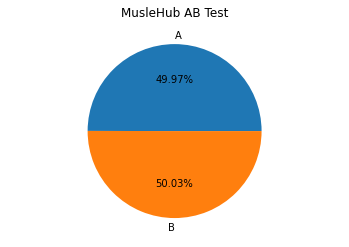

<Figure size 432x288 with 0 Axes>

In [195]:
plt.axis('equal')
plt.pie(ab_counts['email'].values,
        labels= ab_counts['ab_test_group'].values,
                autopct='%0.2f%%')
plt.title("MusleHub AB Test")
plt.show()
plt.savefig('ab_test_pie_chart.png')


## Step 4: Who picks up an application?

Recall that the sign-up process for MuscleHub has several steps:
1. Take a fitness test with a personal trainer (only Group A)
2. Fill out an application for the gym
3. Send in their payment for their first month's membership

Let's examine how many people make it to Step 2, filling out an application.

Start by creating a new column in `df` called `is_application` which is `Application` if `application_date` is not `None` and `No Application`, otherwise.

In [196]:
df['is_application'] = df['application_date'].apply(lambda x: 'Yes_Application' if pd.notnull(x) else\
                                                   'No_Application')

df.head(5)

,visit_date,last_name,gender,email,fitness_test_date,application_date,purchase_date,ab_test_group,is_application
0,7-1-17,Walter,female,KimWalter58@gmail.com,2017-07-03,None,None,A,No_Application
1,7-1-17,Webster,male,TW3857@gmail.com,2017-07-02,None,None,A,No_Application
2,7-1-17,Bowen,male,Edward.Bowen@gmail.com,None,2017-07-04,2017-07-04,B,Yes_Application
3,7-1-17,Bauer,male,Marcus.Bauer@gmail.com,2017-07-01,2017-07-03,2017-07-05,A,Yes_Application
4,7-1-17,Best,female,RB6305@hotmail.com,2017-07-02,None,None,A,No_Application


Now, using `groupby`, count how many people from Group A and Group B either do or don't pick up an application.  You'll want to group by `ab_test_group` and `is_application`.  Save this new DataFrame as `app_counts`

In [197]:
app_counts = df.groupby(['ab_test_group', 'is_application'])['email'].nunique().reset_index()
app_counts

,ab_test_group,is_application,email
0,A,No_Application,2247
1,A,Yes_Application,250
2,B,No_Application,2175
3,B,Yes_Application,325


We're going to want to calculate the percent of people in each group who complete an application.  It's going to be much easier to do this if we pivot `app_counts` such that:
- The `index` is `ab_test_group`
- The `columns` are `is_application`
Perform this pivot and save it to the variable `app_pivot`.  Remember to call `reset_index()` at the end of the pivot!

In [198]:
app_counts_pivot = app_counts.pivot(columns = 'is_application', index = 'ab_test_group', \
                                    values = 'email').reset_index()
app_counts_pivot

is_application,ab_test_group,No_Application,Yes_Application
0,A,2247,250
1,B,2175,325


Define a new column called `Total`, which is the sum of `Application` and `No Application`.

In [199]:
app_counts_pivot['Total'] = app_counts_pivot['Yes_Application'] +  app_counts_pivot['No_Application']
app_counts_pivot

is_application,ab_test_group,No_Application,Yes_Application,Total
0,A,2247,250,2497
1,B,2175,325,2500


Calculate another column called `Percent with Application`, which is equal to `Application` divided by `Total`.

In [200]:
app_counts_pivot['App_%'] = round(app_counts_pivot['Yes_Application'] *100/app_counts_pivot['Total'])
app_counts_pivot

is_application,ab_test_group,No_Application,Yes_Application,Total,App_%
0,A,2247,250,2497,10.0
1,B,2175,325,2500,13.0


It looks like more people from Group B turned in an application.  Why might that be?

We need to know if this difference is statistically significant.

Choose a hypothesis tests, import it from `scipy` and perform it.  Be sure to note the p-value.
Is this result significant?

More people from Group B turned in an application, reasons might be:
- female or over_weight peole might find it itimidating to have the test;
- peole choose easier option, set up appointment time for testing could be viewed as 'too much hustle'


In [201]:
from scipy.stats import chi2_contingency
import numpy as np

Chi Square:  if the probability of turning in application forms depends on our categorical variable: 
    test A or B. If we want to understand whether the outcomes of AB test are  associated. 
•	chi2, pval, dof, expected = chi2_contingency(X)
•	print pval


In [202]:
contingency_a_b = pd.DataFrame([
    [250, 2247],
    [325, 2175]
],
    index = ['A', 'B'], 
    columns = ['Yes_Application', 'No_Application']

)
contingency_a_b



,Yes_Application,No_Application
A,250,2247
B,325,2175


In [203]:
chi2, pval, dof, expected = chi2_contingency(contingency_a_b)
significance = 0.05
print(chi2, pval, dof, expected)
print('p-value=%.6f, significance=%.2f\n' % (pval, significance))
if pval < significance:
      print("""At %.2f level of significance, we reject the null hypotheses and accept H1
They are not independent.""" % (significance))
else:
      print("""At %.2f level of significance, we accept the null hypotheses.
They are independent.""" % (significance))




10.661662931668443 0.0010937901055810598 1 [[ 287.32739644 2209.67260356]
 [ 287.67260356 2212.32739644]]
p-value=0.001094, significance=0.05

At 0.05 level of significance, we reject the null hypotheses and accept H1
They are not independent.



Not independent, associated, related, relationship exists between 2 variables.  There are relationships between the categorical variables. Knowing the value of one variable does help you predict the value of another variable.  p-value <= significance level In this case p < 0.05, so this result is thought of as being "significant" meaning we think the variables are not independent.  In other words, because p < 0.05 we think that taking the fitness test is linked to filling the application form.  Reasons might be:
- peole taking the fitness tests are more healthy conscious, want to start their health & fitness journey by ultimately become a member;
- might be persuation from personal trainer who conducts the tests;
- might be easier to pick up the app form from the reception desk before or after the fitness test.




## Step 4: Who purchases a membership?

Of those who picked up an application, how many purchased a membership?

Let's begin by adding a column to `df` called `is_member` which is `Member` if `purchase_date` is not `None`, and `Not Member` otherwise.

In [204]:
df['is_member'] = df['purchase_date'].apply(lambda x: 'is_Member' if pd.notnull(x) else 'not_Member')

df.head(5)


,visit_date,last_name,gender,email,fitness_test_date,application_date,purchase_date,ab_test_group,is_application,is_member
0,7-1-17,Walter,female,KimWalter58@gmail.com,2017-07-03,None,None,A,No_Application,not_Member
1,7-1-17,Webster,male,TW3857@gmail.com,2017-07-02,None,None,A,No_Application,not_Member
2,7-1-17,Bowen,male,Edward.Bowen@gmail.com,None,2017-07-04,2017-07-04,B,Yes_Application,is_Member
3,7-1-17,Bauer,male,Marcus.Bauer@gmail.com,2017-07-01,2017-07-03,2017-07-05,A,Yes_Application,is_Member
4,7-1-17,Best,female,RB6305@hotmail.com,2017-07-02,None,None,A,No_Application,not_Member


Now, let's create a DataFrame called `just_apps` the contains only people who picked up an application.

In [205]:
#just_apps = df['is_application'].apply(lambda x: x == 'Yes_Application')
#just_apps
#just_apps = df[df.is_application == 'Application']

just_apps = df[df.is_application == 'Yes_Application']
just_apps.head()

,visit_date,last_name,gender,email,fitness_test_date,application_date,purchase_date,ab_test_group,is_application,is_member
2,7-1-17,Bowen,male,Edward.Bowen@gmail.com,None,2017-07-04,2017-07-04,B,Yes_Application,is_Member
3,7-1-17,Bauer,male,Marcus.Bauer@gmail.com,2017-07-01,2017-07-03,2017-07-05,A,Yes_Application,is_Member
9,7-1-17,Cardenas,male,SCardenas1980@gmail.com,2017-07-07,2017-07-06,None,A,Yes_Application,not_Member
11,7-1-17,Munoz,female,VMunoz1998@gmail.com,2017-07-03,2017-07-05,2017-07-06,A,Yes_Application,is_Member
35,7-1-17,Burks,male,MB9820@gmail.com,None,2017-07-07,2017-07-13,B,Yes_Application,is_Member


Great! Now, let's do a `groupby` to find out how many people in `just_apps` are and aren't members from each group.  Follow the same process that we did in Step 4, including pivoting the data.  You should end up with a DataFrame that looks like this:

|is_member|ab_test_group|Member|Not Member|Total|Percent Purchase|
|-|-|-|-|-|-|
|0|A|?|?|?|?|
|1|B|?|?|?|?|

Save your final DataFrame as `member_pivot`.

In [206]:
member_counts = just_apps.groupby(['ab_test_group', 'is_member'])['email'].nunique().reset_index()
member_counts


,ab_test_group,is_member,email
0,A,is_Member,200
1,A,not_Member,50
2,B,is_Member,250
3,B,not_Member,75


In [207]:
member_counts_pivot = member_counts.pivot(columns = 'is_member', index = 'ab_test_group', \
                                         values = 'email').reset_index()
member_counts_pivot

is_member,ab_test_group,is_Member,not_Member
0,A,200,50
1,B,250,75


In [208]:
member_counts_pivot['total_member'] = member_counts_pivot['is_Member'] + \
member_counts_pivot['not_Member']
member_counts_pivot['member_%'] = round(member_counts_pivot['is_Member'] * 100/member_counts_pivot\
['total_member'])
member_counts_pivot

is_member,ab_test_group,is_Member,not_Member,total_member,member_%
0,A,200,50,250,80.0
1,B,250,75,325,77.0


It looks like people who took the fitness test were more likely to purchase a membership **if** they picked up an application.  Why might that be?

Just like before, we need to know if this difference is statistically significant.  Choose a hypothesis tests, import it from `scipy` and perform it.  Be sure to note the p-value.
Is this result significant?

 looks like people who took the fitness test were more likely to purchase a membership if they picked up an application. Reasons might be:
 - peole who take fitness test are more health conscious, and want to start the journey to get fitter, and more likely to sigh up membership;
 - when people under take fitness test, they are aleady in the gym, it is easy to pick up an application form from the reception;
 - or the trainer in the gym who conducted fitness test, have incentive or 'commmision' to sign up members.

In [209]:
contingency_a_b_member = pd.DataFrame([
    [200, 50],
    [250, 75]
],
    index = ['A', 'B'], 
    columns = ['Yes_Member', 'No_Member']

)
contingency_a_b_member


,Yes_Member,No_Member
A,200,50
B,250,75


In [226]:
chi, pval, dof, exp = chi2_contingency(contingency_a_b_member)
significance = 0.05
print(chi2, pval, dof, expected)
print('p-value=%.6f, significance=%.2f\n' % (pval, significance))
if pval < significance:
      print("""At %.2f level of significance, we reject the null hypotheses and accept H1
They are not independent.""" % (significance))
else:
      print("""At %.2f level of significance, we accept the null hypotheses.
They are independent.""" % (significance))

10.661662931668443 0.43258646051083327 1 [[ 287.32739644 2209.67260356]
 [ 287.67260356 2212.32739644]]
p-value=0.432586, significance=0.05

At 0.05 level of significance, we accept the null hypotheses.
They are independent.



 In this case p is greater than 0.05, so we believe the variables are independent (ie not linked together). In other words, taking the fitness test or not,  probably do not have a different influence on signing up membership, if they have already filled in the application forms.

Here when we only consider people who have already picked up an application, we can see that there is no significant difference in membership between Group A and Group B. Conducting Fitness test or not do not have a different influence on signing up membership.  Reason might be:
- If people bother to fill in the membership form,  they probably have already made up their minds.


Previously, we looked at what percent of people **who picked up applications** purchased memberships.  What we really care about is what percentage of **all visitors** purchased memberships.  Return to `df` and do a `groupby` to find out how many people in `df` are and aren't members from each group.  Follow the same process that we did in Step 4, including pivoting the data.  You should end up with a DataFrame that looks like this:

|is_member|ab_test_group|Member|Not Member|Total|Percent Purchase|
|-|-|-|-|-|-|
|0|A|?|?|?|?|
|1|B|?|?|?|?|

Save your final DataFrame as `final_member_pivot`.

In [211]:

final_member_counts = df.groupby(['ab_test_group', 'is_member'])['email'].nunique().reset_index()
final_member_counts


,ab_test_group,is_member,email
0,A,is_Member,200
1,A,not_Member,2297
2,B,is_Member,250
3,B,not_Member,2250


In [212]:
final_member_pivot = final_member_counts.pivot(columns = 'is_member', index = 'ab_test_group',\
                                               values = 'email').reset_index()
final_member_pivot


is_member,ab_test_group,is_Member,not_Member
0,A,200,2297
1,B,250,2250


In [213]:
final_member_pivot['total_member'] = final_member_pivot['is_Member']+ final_member_pivot['not_Member']
final_member_pivot


is_member,ab_test_group,is_Member,not_Member,total_member
0,A,200,2297,2497
1,B,250,2250,2500


In [214]:
final_member_pivot['purchase_%'] = round(final_member_pivot['is_Member'] *100/final_member_pivot['total_member'])
final_member_pivot

is_member,ab_test_group,is_Member,not_Member,total_member,purchase_%
0,A,200,2297,2497,8.0
1,B,250,2250,2500,10.0


In [215]:
contingency_a_b_v_to_m = pd.DataFrame([
    [200, 2297],
    [250, 2250]
],
    index = ['A', 'B'], 
    columns = ['is_Member', 'not_Member']

)
contingency_a_b_v_to_m

,is_Member,not_Member
A,200,2297
B,250,2250


Previously, when we only considered people who had **already picked up an application**, we saw that there was no significant difference in membership between Group A and Group B.

Now, when we consider all people who **visit MuscleHub**, we see that there might be a significant different in memberships between Group A and Group B.  Perform a significance test and check.

In [227]:
chi, pval, dof, exp = chi2_contingency(contingency_a_b_v_to_m)
significance = 0.05
print(chi2, pval, dof, expected)
print('p-value=%.6f, significance=%.2f\n' % (pval, significance))
if pval < significance:
      print("""At %.2f level of significance, we reject the null hypotheses and accept H1
They are not independent.""" % (significance))
else:
      print("""At %.2f level of significance, we accept the null hypotheses.
They are independent.""" % (significance))

10.661662931668443 0.01603421266664434 1 [[ 287.32739644 2209.67260356]
 [ 287.67260356 2212.32739644]]
p-value=0.016034, significance=0.05

At 0.05 level of significance, we reject the null hypotheses and accept H1
They are not independent.


At 0.05 level of significance, we reject the null hypotheses and accept H1.
They are not independent.
Yes! It looks like there is a significant difference between Group A and Group B !

  p-value <= significance level In this case p < 0.05, so this result is thought of as being "significant" meaning we think the variables are not independent,  that Group A and B are linked to ultimate membership signing. 
  
 Alternative hypothesis: Not independent, associated, related, relationship exists between 2 variables.  There are relationships between the categorical variables.   p-value <= significance level In this case p < 0.05, so this result is thought of as being "significant" meaning we think the variables are not independent.  In other words, because 0.043 < 0.05 we think that taking fitness test is linked to membership signing. 

We conclude that people who do not take the fitness test, are more likely to sign up the MuscleHub Membership. Reasons might be:
- Good marketing campaign from MuscleHub;
- On-line signing up without going to do the test, some people sign up without even going to the gym during the year, that is what most people do, that's why gym owners love 'direct debit'.


## Step 5: Summarize the acquisition funel with a chart

We'd like to make a bar chart for Janet that shows the difference between Group A (people who were given the fitness test) and Group B (people who were not given the fitness test) at each state of the process:
- Percent of visitors who apply
- Percent of applicants who purchase a membership
- Percent of visitors who purchase a membership

Create one plot for **each** of the three sets of percentages that you calculated in `app_pivot`, `member_pivot` and `final_member_pivot`.  Each plot should:
- Label the two bars as `Fitness Test` and `No Fitness Test`
- Make sure that the y-axis ticks are expressed as percents (i.e., `5%`)
- Have a title

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

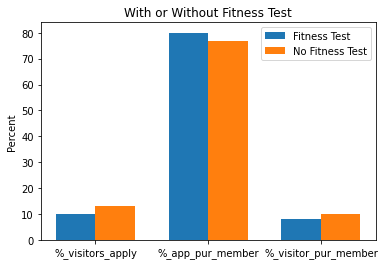

<Figure size 432x288 with 0 Axes>

In [230]:
labels = ['%_visitors_apply', '%_app_pur_member', '%_visitor_pur_member']
Fitness_Test = [10,80, 8] 
No_Fitness_Test = [13, 77,10]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Fitness_Test, width, label='Fitness Test')
rects2 = ax.bar(x + width/2, No_Fitness_Test, width, label='No Fitness Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percent')
ax.set_title('With or Without Fitness Test')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()
plt.savefig('ab_test_bar_chart.png')
                


In [225]:
app_counts_pivot

is_application,ab_test_group,No_Application,Yes_Application,Total,App_%
0,A,2247,250,2497,10.0
1,B,2175,325,2500,13.0


In [219]:
member_counts_pivot

is_member,ab_test_group,is_Member,not_Member,total_member,member_%
0,A,200,50,250,80.0
1,B,250,75,325,77.0


In [220]:
final_member_pivot

is_member,ab_test_group,is_Member,not_Member,total_member,purchase_%
0,A,200,2297,2497,8.0
1,B,250,2250,2500,10.0
